# KDE - p_h_dt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

from scipy.stats import gaussian_kde

In [2]:
data = np.genfromtxt('gwb_9bins.txt')

# EPTA DR2 total observation timespan
Tspan = 10.33 * 365.25 * 24 * 3600

# First 9 harmonics of 1/Tspan (< 1\yr)
fs = np.arange(1, 10) / Tspan
print('Frequencies (Hz)', fs)

Frequencies (Hz) [3.06757868e-09 6.13515737e-09 9.20273605e-09 1.22703147e-08
 1.53378934e-08 1.84054721e-08 2.14730508e-08 2.45406295e-08
 2.76082082e-08]


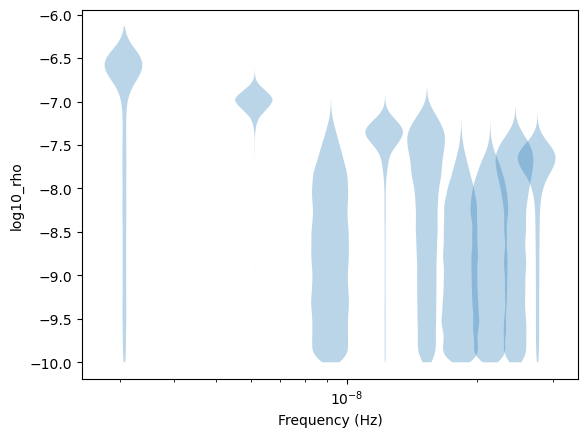

In [3]:
# plot violins
ax = plt.subplot(111)
ax.set_ylabel(r'log10_rho')
ax.violinplot(data, positions=fs, widths=fs*0.2, showmeans=False, showextrema=False)

plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.savefig('./spectrum.png', bbox_inches='tight')
plt.show();

In [4]:
N = (12 * (np.pi**2) * (fs**3) * Tspan)**0.5

for i in range (9):
    data[:,i] = (10**data[:,i])*N[i]
data

array([[6.34004722e-15, 8.91647933e-15, 3.35306848e-15, ...,
        4.87795849e-15, 3.26520705e-16, 1.60322105e-14],
       [5.74667440e-15, 8.97253112e-15, 3.49610463e-15, ...,
        4.65727773e-15, 2.04974912e-16, 1.65652313e-14],
       [5.74667440e-15, 8.97253112e-15, 3.49610463e-15, ...,
        4.65727773e-15, 2.04974912e-16, 1.65652313e-14],
       ...,
       [9.65600471e-15, 1.12412217e-14, 2.22146180e-15, ...,
        6.26919948e-17, 1.19198860e-14, 1.45186757e-14],
       [9.65600471e-15, 1.12412217e-14, 2.22146180e-15, ...,
        6.26919948e-17, 1.19198860e-14, 1.45186757e-14],
       [9.65600471e-15, 1.12412217e-14, 2.22146180e-15, ...,
        6.26919948e-17, 1.19198860e-14, 1.45186757e-14]], shape=(89991, 9))

In [5]:
data = np.log10(data)
data

array([[-14.19790751, -14.04980659, -14.47455758, ..., -14.3117619 ,
        -15.48608927, -13.79500659],
       [-14.24058341, -14.04708503, -14.45641558, ..., -14.33186786,
        -15.68829929, -13.7808025 ],
       [-14.24058341, -14.04708503, -14.45641558, ..., -14.33186786,
        -15.68829929, -13.7808025 ],
       ...,
       [-14.01520253, -13.94918649, -14.65336115, ..., -16.20278791,
        -13.9237279 , -13.838073  ],
       [-14.01520253, -13.94918649, -14.65336115, ..., -16.20278791,
        -13.9237279 , -13.838073  ],
       [-14.01520253, -13.94918649, -14.65336115, ..., -16.20278791,
        -13.9237279 , -13.838073  ]], shape=(89991, 9))

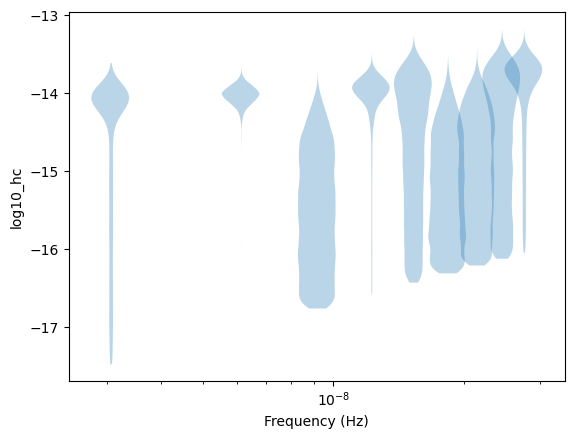

In [6]:
ax = plt.subplot(111)
ax.set_ylabel(r'log10_hc')
ax.violinplot(data, positions=fs, widths=fs*0.2, showmeans=False, showextrema=False)

plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.show();

In [7]:
h_grid = np.linspace(1e-15, 1e-13, 10000)
dh = h_grid[1]-h_grid[0]

In [8]:
p_h_dt=[]
pdf_h_dt=[]

for i in range (0,9):
    pdf = gaussian_kde(data[:, i])
    pdf_h_dt.append(pdf)
    p_h_dt.append(pdf(np.log10(h_grid)))
    #plt.plot(h_grid,pdf(h_grid))

p_h_dt = np.column_stack(p_h_dt)

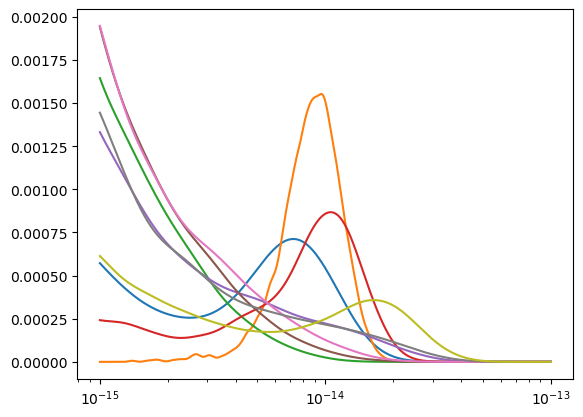

In [9]:
p_h=[]
for i in range(9):
    a=p_h_dt[:,i] * (dh/h_grid) / np.log(10)
    p_h.append(a)
    plt.plot(h_grid, a)

p_h = np.column_stack(p_h)
plt.xscale('log')

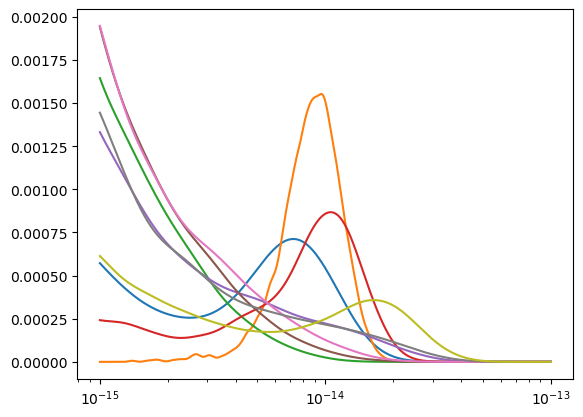

In [10]:
plt.plot(h_grid, p_h)
plt.xscale('log')

In [11]:
np.savetxt("p_h.txt", p_h)

In [12]:
p_h = np.genfromtxt("p_h.txt")

In [13]:
p_h

array([[5.72019602e-04, 2.08954016e-26, 1.64395397e-03, ...,
        1.94633430e-03, 1.44355503e-03, 6.13391851e-04],
       [5.65885615e-04, 3.48695005e-25, 1.62877336e-03, ...,
        1.92609499e-03, 1.43042278e-03, 6.07680339e-04],
       [5.59848692e-04, 5.18961619e-24, 1.61404673e-03, ...,
        1.90613493e-03, 1.41731843e-03, 6.02006679e-04],
       ...,
       [1.59771898e-15, 0.00000000e+00, 1.38246904e-29, ...,
        6.07001477e-17, 1.16591418e-09, 4.47556775e-10],
       [1.59379505e-15, 0.00000000e+00, 1.37461768e-29, ...,
        6.04619548e-17, 1.16411154e-09, 4.46695035e-10],
       [1.58988091e-15, 0.00000000e+00, 1.36681124e-29, ...,
        6.02246960e-17, 1.16231163e-09, 4.45834917e-10]], shape=(10000, 9))

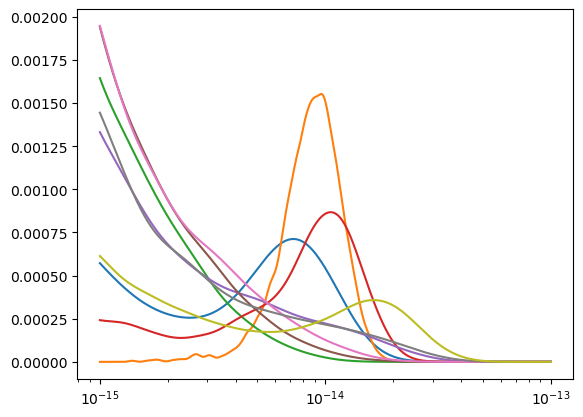

In [14]:
plt.plot(h_grid, p_h)
plt.xscale('log')

reweight gaussians (mean,sigma)

In [15]:
from real_gwb_likelihood_modified import GWBSpectrum

gwb_functions = GWBSpectrum()

mean, sigma, _ = gwb_functions.prediction6parameters_mean_sigma(freq=np.log10(fs), A=-1., alpha=1., beta=1., M0=8., rho=2., e0=0.5)
x = np.asarray(h_grid)
x = x[:, None]             
m = mean[None, :]            
s = sigma[None, :] 
prob_h = np.exp(-0.5 * ((x - m) / s)**2) / (s * np.sqrt(2 * np.pi)) 

p_h_theta = prob_h * np.log(10) * (x/dh)

2025-10-09 14:24:03.903459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/beatricetonello/opt/anaconda3/envs/thesisenv/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/beatricetonello/opt/anaconda3/envs/thesisenv/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PowerTransformer from version 1.2.2 when using version 1.

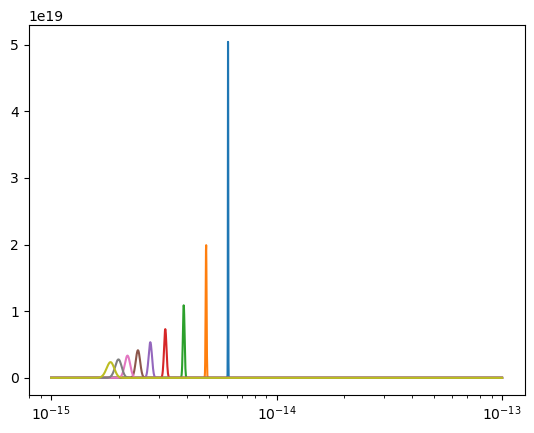

In [16]:
plt.plot(h_grid, p_h_theta);
plt.xscale('log')